<a href="https://colab.research.google.com/github/ChenxiCui97/Dream-Project/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Install prerequsite


!pip install Biopython

     |████████████████████████████████| 389kB 4.6MB/s 


In [0]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read the sPTD, PPROM,control data from csv file
import pandas as pd


#PPROM=pd.read_csv("/content/drive/My Drive/genomic_project/disease_data_PPROM.csv", sep=",",index_col=0)
sPTD=pd.read_csv("/content/drive/My Drive/genomic_project/disease_data_sPTD.csv", sep=",",index_col=0)
control = pd.read_csv("/content/drive/My Drive/genomic_project/control_data_sPTD.csv", sep=",",index_col=0)
X_test_s=pd.read_csv("/content/drive/My Drive/genomic_project/test_set_data_sPTD.csv", sep=",",index_col=0)



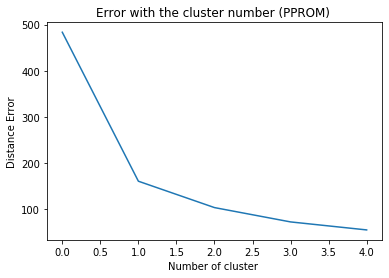

In [0]:
import matplotlib.pyplot as plt
from Bio.Cluster import kcluster
# find the best k point for k cluster 
error =[]
sPTD_arr=pd.DataFrame.to_numpy(sPTD)
for i in range(1,6):
  clusterid,e,_= kcluster(sPTD_arr,nclusters=i)
  error.append(e)
plt.plot(error)
plt.xlabel('Number of cluster ')
plt.ylabel('Distance Error')
plt.title('Error with the cluster number (sPTD) ')

plt.show()

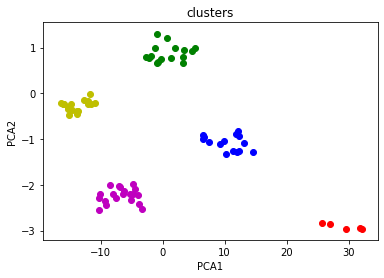

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

df1=sPTD.copy()

df1['jllable']=clusterid
df_count_type=df1.groupby('jllable').apply(np.size)
 

new_df=df1
new_df

 
##decrease the dimension of the kcluster
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(new_df))
 
#Data visualzation
new_pca
new_df.index=range(100)
d = new_pca.loc[new_df['jllable'] == 0]
plt.scatter(d[0], d[1], c='r')
d = new_pca[new_df['jllable'] == 1]
plt.scatter(d[0], d[1],c='m')
d = new_pca[new_df['jllable'] == 2]
plt.scatter(d[0], d[1],c='b')
d = new_pca[new_df['jllable'] == 3]
plt.scatter(d[0], d[1],c='y')
d = new_pca[new_df['jllable'] == 4]
plt.scatter(d[0], d[1],c='g')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('clusters')

plt.show()
plt.show()

#


In [0]:
clusterid

array([1, 3, 1, 1, 2, 2, 3, 4, 1, 0, 2, 3, 2, 2, 1, 1, 4, 1, 3, 4, 4, 3,
       4, 2, 2, 4, 1, 4, 1, 3, 0, 4, 2, 2, 2, 3, 1, 3, 2, 2, 1, 2, 4, 2,
       3, 1, 4, 1, 1, 3, 3, 1, 4, 2, 2, 3, 4, 3, 4, 4, 4, 1, 4, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 3, 1, 3, 2, 4, 0, 1, 2, 0, 0, 2, 4, 3, 4, 2, 4,
       3, 1, 4, 2, 2, 0, 3, 1, 4, 2, 3, 2], dtype=int32)

In [0]:
#classfiy the gene into the 10 clusters
s=[]
c=[]
t=[]
import pandas as pd
from pandas.core.frame import DataFrame
for i in range(10):
  s.append(sPTD[clusterid==i].mean(axis=0))
  c.append(control[clusterid==i].mean(axis=0))
  t.append(X_test_s[clusterid==i].mean(axis=0))
sPTD=DataFrame(s)
control=DataFrame(c)
X_test_s=DataFrame(t)

In [0]:
control=control.transpose()
#PPROM=PPROM.transpose()
sPTD=sPTD.transpose()
#X_test_p=X_test_p.transpose()
X_test_s=X_test_s.transpose()

In [0]:
#label the positive and negative samples 
sPTD["label"]=1
control_s=control#[:len(sPTD)]
control_s["label"]=0

b=pd.concat([sPTD,control_s])
#oversampling if needs
#b=pd.concat([sPTD,b])
#b=pd.concat([sPTD,b])

In [0]:
b

,0,1,2,3,4,5,6,7,8,9,label
GSM1437845,2.257722,7.114099,9.352295,8.020048,8.171473,11.766608,3.549757,5.821242,6.268804,7.822197,1
GSM1437886,2.440755,4.781217,9.666263,7.876274,8.541619,11.834922,3.945036,5.719079,6.425729,8.334376,1
GSM1437894,5.078132,6.780830,9.902271,7.264648,7.738341,12.711094,3.224495,6.059747,6.551519,7.247577,1
GSM1437898,2.348175,6.671888,9.923135,8.296299,7.893273,11.746613,3.672716,3.690297,6.858636,7.730115,1
GSM1437908,2.413334,6.589952,9.102571,7.063113,7.903485,12.486332,3.325473,5.573027,7.010863,7.052345,1
...,...,...,...,...,...,...,...,...,...,...,...
Tarca_255_P3G08,2.624726,6.002704,9.231155,8.227279,7.286006,11.974334,3.703699,5.938395,7.004945,7.427245,0
Tarca_252_P3D08,2.423321,6.682267,9.456083,8.402426,6.542111,12.028219,3.537836,5.361287,6.653999,7.543578,0
Tarca_542_P6F08,2.254792,6.033776,8.625361,7.258136,8.759978,12.594476,3.529507,5.734697,6.467805,7.303670,0
Tarca_566_P6F11,2.467564,6.856813,9.334507,7.546269,7.692380,12.788535,3.611561,5.851847,6.547349,6.948767,0


In [0]:
#reshuffle the data
from sklearn.utils import shuffle
df = shuffle(b)
data=df[df.columns[:-1]]
arget=df["label"]


In [0]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import svm
#build the random forest model

data, X_test, arget, y_test = train_test_split(data, arget, test_size=0.2, random_state=7)

rf=RandomForestClassifier()
"""rf=svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)"""
rf.fit(data,arget)




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#cross valdation
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(rf, data, arget, cv=10))

In [0]:
X_test_s

,0,1,2,3,4,5,6,7,8,9
Tarca_313_P4A04,2.411796,6.673247,9.816366,7.751050,6.526359,12.683635,3.560103,5.782949,7.097326,7.531526
Tarca_317_P4E04,2.359306,7.489131,9.908140,7.918931,6.376015,13.029704,3.564815,6.112945,5.955634,7.383830
Tarca_378_P4B12,2.418504,6.813163,9.819965,7.681770,7.238820,12.787379,3.516556,5.841136,6.685201,7.591622
Tarca_855_P8G11,2.381308,6.819695,9.421446,8.869637,6.967648,11.677930,3.639303,5.527086,6.605542,7.489124
Tarca_828_P9D08,2.347232,6.164798,9.168180,8.509706,7.852173,11.898076,3.523170,5.542234,6.869134,7.902509
...,...,...,...,...,...,...,...,...,...,...
Tarca_489_P6A02,2.355998,5.889154,9.676690,7.926519,6.209656,11.771689,3.597852,5.844219,7.362168,8.002264
Tarca_505_P6A04,2.419254,5.915857,9.255852,8.658728,6.376493,11.554936,3.270586,5.887288,6.703420,8.290460
Tarca_529_P6A07,2.361898,6.469936,8.987759,7.677342,6.593061,11.702566,3.396105,6.041300,7.283637,8.640934
Tarca_008_P1A08,2.575781,5.432531,9.174657,7.569923,7.353295,12.366661,3.916896,5.692568,6.804290,6.578480


In [0]:
#predict the result
y_score=rf.predict(X_test_s)
#y_score=rf.predict(data)
#y_test=arget

#save results to files
#y= pd.DataFrame(y_score[:,1],index=X_test_s.index)
#y.to_csv("/content/drive/My Drive/genomic_project/res_PPROM_1.csv")

<Figure size 432x288 with 0 Axes>

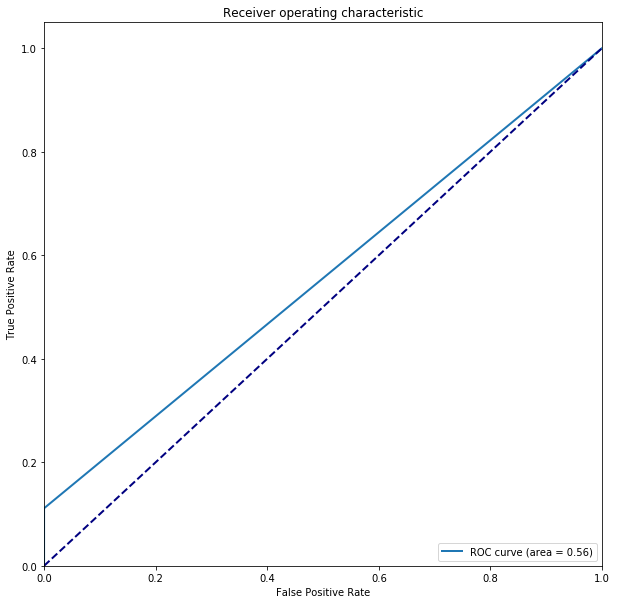

In [0]:
#For local test set, plot the ROC curve
fpr,tpr,threshold = roc_curve(y_test, y_score) ###calculate FP,TP
roc_auc = auc(fpr,tpr) ##auc
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, 
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test, y_score)

0.8048780487804879

In [0]:
f1_score(y_test, y_score, average='weighted')  

0.9959180952789054

In [0]:
#data post-process
import pandas as pd
final=pd.read_csv("/content/drive/My Drive/genomic_project/res_2.csv", sep=",")
note=pd.read_csv("/content/drive/My Drive/genomic_project/anoSC2_v20_nokey.csv", sep=",")

n=note[note.SampleID.isin(final.SampleID)]
WithID=pd.merge(final, n, how='left', on=["SampleID"])

In [0]:
final

,SampleID,PPROM,sPTD
0,Tarca_313_P4A04,0.3,0.0
1,Tarca_317_P4E04,0.2,0.1
2,Tarca_378_P4B12,0.1,0.0
3,Tarca_855_P8G11,0.3,0.0
4,Tarca_828_P9D08,0.5,0.2
...,...,...,...
299,Tarca_489_P6A02,0.4,0.5
300,Tarca_505_P6A04,0.5,0.1
301,Tarca_529_P6A07,0.1,0.3
302,Tarca_008_P1A08,0.1,0.0


In [0]:
WithID.to_csv("/content/drive/My Drive/genomic_project/manually_4.csv",sep=",")

In [0]:
#filter out sample which GA below 25
GAFilter=WithID[WithID.GA>=25]

In [0]:
[19748,20243,19709,22546] #for these individual there is no sample when GA>25

[19748, 20243, 19709, 22546]

In [0]:
sPTD_GA=GAFilter[["IndividualID","sPTD"]]
PPROM_GA=GAFilter[["IndividualID","PPROM"]]

In [0]:
#get the average smaple probablity  for each individual when GA>25
sPTD_res=sPTD_GA.groupby(['IndividualID'], sort=False)['sPTD'].mean()

In [0]:
#get the average smaple probablity for each individual when GA>25
PPROM_res=PPROM_GA.groupby(['IndividualID'], sort=False)['PPROM'].mean()

In [0]:
PPROM_res

IndividualID
18275    0.250000
18427    0.433333
18473    0.200000
19086    0.366667
19217    0.333333
           ...   
21284    0.300000
22117    0.500000
22122    0.300000
22306    0.233333
22463    0.400000
Name: PPROM, Length: 83, dtype: float64

In [0]:
final_res=pd.merge(sPTD_res, PPROM_res, how='left', on=["IndividualID"])

In [0]:
final_res

,sPTD,PPROM
IndividualID,,
18275,0.050000,0.250000
18427,0.100000,0.433333
18473,0.100000,0.200000
19086,0.166667,0.366667
19217,0.233333,0.333333
...,...,...
21284,0.100000,0.300000
22117,0.500000,0.500000
22122,0.050000,0.300000


In [0]:
final_res.to_csv("/content/drive/My Drive/genomic_project/f_res_4.csv", sep=",")